In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6,6)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [12]:
base_dir = "/storage/vbsjjlnu/VBSjjlnu_v7"
version = "v5"

datasets  = ["dnninputs_2016_v4","dnninputs_2017_v4","dnninputs_2018_v4"]

cut     = "boost_sig"
if "res" in cut: 
    phasespace="resolved" 
else:
    phasespace='boosted'
    

output_dir = os.path.join(base_dir, "FullRun2_v7", cut, "samples/" + version)

samples_dirs = [os.path.join(base_dir, p) for p in datasets]

lumi = { 2016: 35.867, 2017: 41.5 , 2018: 59.74}

In [13]:
output_dir

'/storage/vbsjjlnu/VBSjjlnu_v7/FullRun2_v7/boost_sig/samples/v5'

In [14]:
samples_dirs

['/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v4',
 '/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2017_v4',
 '/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2018_v4']

In [15]:
columns = ['weight', 'Asym_vbs', 'Centr_vbs', 'Centr_ww', 'Lepton_eta',
       'Lepton_phi', 'Lepton_pt', 'Mtw_lep', 'Mww', 'PuppiMET_phi',
       'PuppiMET_pt', 'Zlep', 'Zvjets_0', 'cosdeltatheta_Vhad',
       'cosdeltatheta_lep', 'cosdeltatheta_vjet_0', 'cosdeltatheta_vjet_1',
       'deltaeta_vbs', 'deltaeta_vjet', 'deltaphi_WV', 'deltaphi_vbs',
       'deltaphi_vjet', 'deltatheta_Vhad', 'deltatheta_lep',
       'deltatheta_vjet_0', 'deltatheta_vjet_1', 'mjj_vbs', 'mjj_vjet',
       'nJets30', 'nvtxGood', 'theta_Vhad', 'theta_lep', 'theta_vjet_0',
       'theta_vjet_1', 'vbs_0_eta', 'vbs_0_phi', 'vbs_0_pt',
       'vbs_0_qglmorphed_res', 'vbs_1_eta', 'vbs_1_phi', 'vbs_1_pt',
       'vbs_1_qglmorphed_res', 'vjet_0_eta', 'vjet_0_phi', 'vjet_0_pt',
       'vjet_0_qglmorphed_res', 'vjet_1_eta', 'vjet_1_phi', 'vjet_1_pt',
       'vjet_1_qglmorphed_res', 'w_had_pt', 'w_lep_pt'] 

In [20]:
columns = ['weight', 'Asym_vbs', 'Centr_vbs', 'Centr_ww', 'Lepton_eta',
       'Lepton_phi', 'Lepton_pt', 'Mtw_lep', 'Mww', 'PuppiMET_phi',
       'PuppiMET_pt', 'Zlep', 'Zvjets_0', 'cosdeltatheta_Vhad',
       'cosdeltatheta_lep', 'cosdeltatheta_vjet_0', 'cosdeltatheta_vjet_1',
       'deltaeta_vbs', 'deltaphi_WV', 'deltaphi_vbs',
       'deltatheta_Vhad', 'deltatheta_lep',
       'deltatheta_vjet_0', 'deltatheta_vjet_1', 'mjj_vbs', 'mjj_vjet',
       'nJets30', 'nvtxGood', 'theta_Vhad', 'theta_lep', 'theta_vjet_0',
       'theta_vjet_1', 'vbs_0_eta', 'vbs_0_phi', 'vbs_0_pt',
       'vbs_0_qglmorphed_boost', 'vbs_1_eta', 'vbs_1_phi', 'vbs_1_pt',
       'vbs_1_qglmorphed_boost', 'vjet_0_eta', 'vjet_0_phi', 'vjet_0_pt',
       'w_had_pt', 'w_lep_pt'] 

In [21]:
signal = "VBS"
sample_names = ["Wjets_HT", "VBS", "DY", "top", "VV",  "VVV","Vg", "VgS",  "VBF-V"]# "Fake",

samples = {}

for samples_dir in samples_dirs:
    for sample in sample_names:
        print(samples_dir, sample)
        f1 = f"{samples_dir}/dataframe_{sample}_{cut}_ele_dnn_inputs_{phasespace}.csv"
        f2 = f"{samples_dir}/dataframe_{sample}_{cut}_mu_dnn_inputs_{phasespace}.csv"
        if not os.path.exists(f1):
            break
        eledf = pd.read_csv(f1,sep=',')[columns]
        mudf = pd.read_csv(f2,sep=',')[columns]
        eledf['lep_flavour'] = 1
        mudf['lep_flavour'] = -1
        
        s =  pd.concat([eledf,mudf], ignore_index=True)
        s["sample_name"] = sample
        if "2016" in samples_dir:
            s["year"] = 2016
            s["_year"] = 1
           # s["weight"] = s["weight"] * lumi[2016] #lumi is included 
        if "2017" in samples_dir:
            s["year"] = 2017
            s["_year"] = 2
           # s["weight"] = s["weight"] * lumi[2017] #lumi is included 
        if "2018" in samples_dir:
            s["year"] = 2018 
            s["_year"] = 3
           # s["weight"] = s["weight"] * lumi[2018] #lumi is included 
            
        foundnan = s.isnull().values.any()
        print("Found nan:",foundnan)
        if foundnan:
            null_columns = s.columns[s.isnull().any()]
            print(s[s.isnull().any(axis=1)][null_columns])
            #filling missing values
            s.fillna(value={"vbs_0_qglmorphed_res":-1,"vbs_1_qglmorphed_res":-1,
                            "vbs_0_qglmorphed_boost":-1,"vbs_1_qglmorphed_boost":-1},inplace=True)
            print(s[s.isnull().any(axis=1)][null_columns])
    
        # remove weight 0 events                    
        if sample in samples:
            samples[sample] = pd.concat([samples[sample], s[s.weight!=0.0]], ignore_index=True)
        else:
            samples[sample] = s[s.weight!=0.0]

/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2016_v4 Wjets_HT
Found nan: True
       vbs_0_qglmorphed_boost  vbs_1_qglmorphed_boost
17480                     NaN                0.757126
18656                     NaN                0.799677
21530                     NaN                0.009416
21806                     NaN                0.004969
21934                     NaN                0.723844
22046                     NaN                0.014139
22098                     NaN                0.680964
22369                     NaN                0.982688
22586                0.869334                     NaN
22962                     NaN                0.435868
23281                     NaN                0.089673
23513                     NaN                0.747690
23570                     NaN                0.216001
23590                     NaN                0.084865
23602                     NaN                0.321779
23642                0.999546                     NaN
23668    

       vbs_0_qglmorphed_boost
1913                      NaN
2448                      NaN
3880                      NaN
5923                      NaN
8686                      NaN
9403                      NaN
9572                      NaN
10545                     NaN
10977                     NaN
16924                     NaN
17651                     NaN
Empty DataFrame
Columns: [vbs_0_qglmorphed_boost]
Index: []
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2018_v4 DY
Found nan: True
       vbs_0_qglmorphed_boost
11505                     NaN
11781                     NaN
11795                     NaN
21081                     NaN
21381                     NaN
21386                     NaN
Empty DataFrame
Columns: [vbs_0_qglmorphed_boost]
Index: []
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2018_v4 top
Found nan: False
/storage/vbsjjlnu/VBSjjlnu_v7/dnninputs_2018_v4 VV
Found nan: True
       vbs_0_qglmorphed_boost
251                       NaN
3172                      NaN
4730             

In [22]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.weight).sum():15}")

Sample name Wjets_HT  , nsamples:     266456,   XS total: 10346.89294993932
Sample name VBS       , nsamples:      51967,   XS total: 329.240766222669
Sample name DY        , nsamples:      63429,   XS total: 1092.9771566065058
Sample name top       , nsamples:      25291,   XS total: 2911.6346984813854
Sample name VV        , nsamples:      73900,   XS total: 1609.3742582123618
Sample name VVV       , nsamples:       1077,   XS total: 24.950368801406007
Sample name Vg        , nsamples:        275,   XS total: 203.11830552950317
Sample name VgS       , nsamples:        230,   XS total: 15.82311619672889
Sample name VBF-V     , nsamples:       1184,   XS total: 426.1645056487238


## Balancing

In [23]:
background = pd.concat([
                samples["top"],
                samples["DY"],
                samples["Wjets_HT"],
                samples["VV"],
                samples["VBF-V"], 
                samples["VVV"],
                samples["Vg"], 
                samples["VgS"], 
                #samples["Fake"], 
                ], ignore_index=True)

signal = samples["VBS"]

In [24]:
'''
If random sampling will be done for the signal we need to assume that the number of signal 
events will be the same of the number of background events --> This assumption will go in the background weight. 
'''
random_sampling = False

### Normalization by bkg events

In [28]:
ratio_neve_bkgsignal= len(background) / len(signal)
print(ratio_neve_bkgsignal)

tot_ev_weighted_bkg = (background.weight_ / background.weight_.mean()).sum()
print("TOT bkg weighted events", tot_ev_weighted_bkg)

rescale_factor_sig  = (tot_ev_weighted_bkg )/ signal.weight_.sum()
print("Rescale facor for signal", rescale_factor_sig)

signal["weight_norm"] = signal.weight_ * rescale_factor_sig
background["weight_norm"] = background.weight_ / background.weight_.mean()

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

8.61132961431954


AttributeError: 'DataFrame' object has no attribute 'weight_'

In [20]:
background.weight_.sum()

1776.771994303065

In [21]:
signal.weight_.sum()

12.259606081710476

### Normalization by signal events

In [25]:
tot_ev_weighted_sig = (signal.weight / signal.weight.mean()).sum()
print("TOT signal weighted events", tot_ev_weighted_sig)

if random_sampling:
    rescale_factor_bkg = (tot_ev_weighted_sig *ratio_neve_bkgsignal )/ background.weight.sum()
else:
    rescale_factor_bkg = (tot_ev_weighted_sig )/ background.weight.sum()
print(rescale_factor_bkg)

signal["weight_norm"] = signal.weight / signal.weight.mean()
background["weight_norm"] = background.weight * rescale_factor_bkg

print("Effective sig events: ", signal.weight_norm.sum())
print("Effective bkg events: ", background.weight_norm.sum())

TOT signal weighted events 51966.999999999985
3.124719017717655
Effective sig events:  51966.999999999985
Effective bkg events:  51966.99999999996


## Save signal and bkg samples

In [26]:
import os

os.makedirs(os.path.join(output_dir, "for_training"), exist_ok=True)
pickle.dump(background, open(os.path.join(output_dir, "for_training/background_balanced.pkl"), "wb"))
pickle.dump(signal, open(os.path.join(output_dir, "for_training/signal_balanced.pkl"), "wb"))

In [13]:
signal.columns

Index(['weight', 'Asym_vbs', 'Centr_vbs', 'Centr_ww', 'Lepton_eta',
       'Lepton_phi', 'Lepton_pt', 'Mtw_lep', 'Mww', 'PuppiMET_phi',
       'PuppiMET_pt', 'Zlep', 'Zvjets_0', 'cosdeltatheta_Vhad',
       'cosdeltatheta_lep', 'cosdeltatheta_vjet_0', 'cosdeltatheta_vjet_1',
       'deltaeta_vbs', 'deltaeta_vjet', 'deltaphi_WV', 'deltaphi_vbs',
       'deltaphi_vjet', 'deltatheta_Vhad', 'deltatheta_lep',
       'deltatheta_vjet_0', 'deltatheta_vjet_1', 'mjj_vbs', 'mjj_vjet',
       'nJets30', 'nvtxGood', 'theta_Vhad', 'theta_lep', 'theta_vjet_0',
       'theta_vjet_1', 'vbs_0_eta', 'vbs_0_phi', 'vbs_0_pt',
       'vbs_0_qglmorphed_res', 'vbs_1_eta', 'vbs_1_phi', 'vbs_1_pt',
       'vbs_1_qglmorphed_res', 'vjet_0_eta', 'vjet_0_phi', 'vjet_0_pt',
       'vjet_0_qglmorphed_res', 'vjet_1_eta', 'vjet_1_phi', 'vjet_1_pt',
       'vjet_1_qglmorphed_res', 'w_had_pt', 'w_lep_pt', 'lep_flavour',
       'sample_name', 'year', '_year', 'weight_norm'],
      dtype='object')

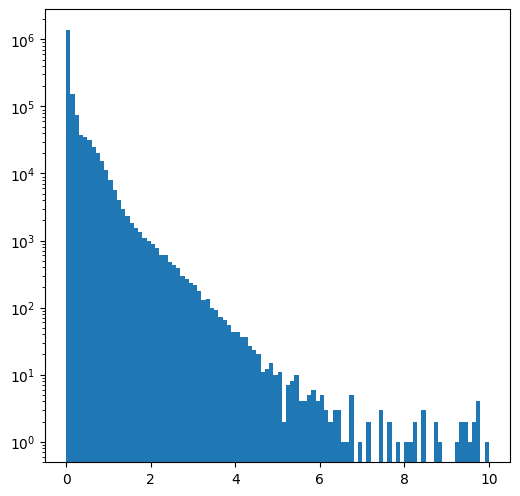

In [14]:
plt.hist(background["weight_norm"], bins=100, range=(0, 10))
plt.yscale("log")

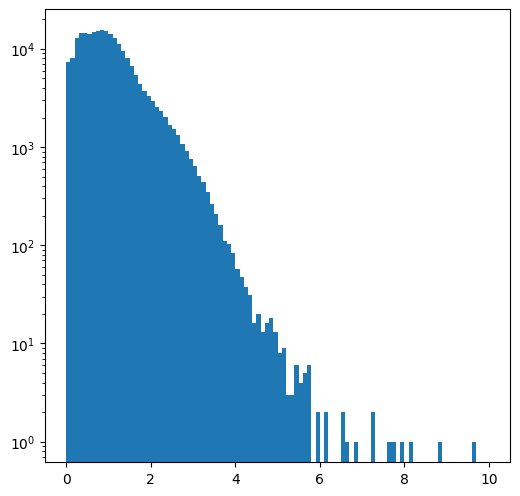

In [15]:
plt.hist(signal["weight_norm"], bins=100, range=(0, 10))
plt.yscale("log")

The total number of events will be manually balanced

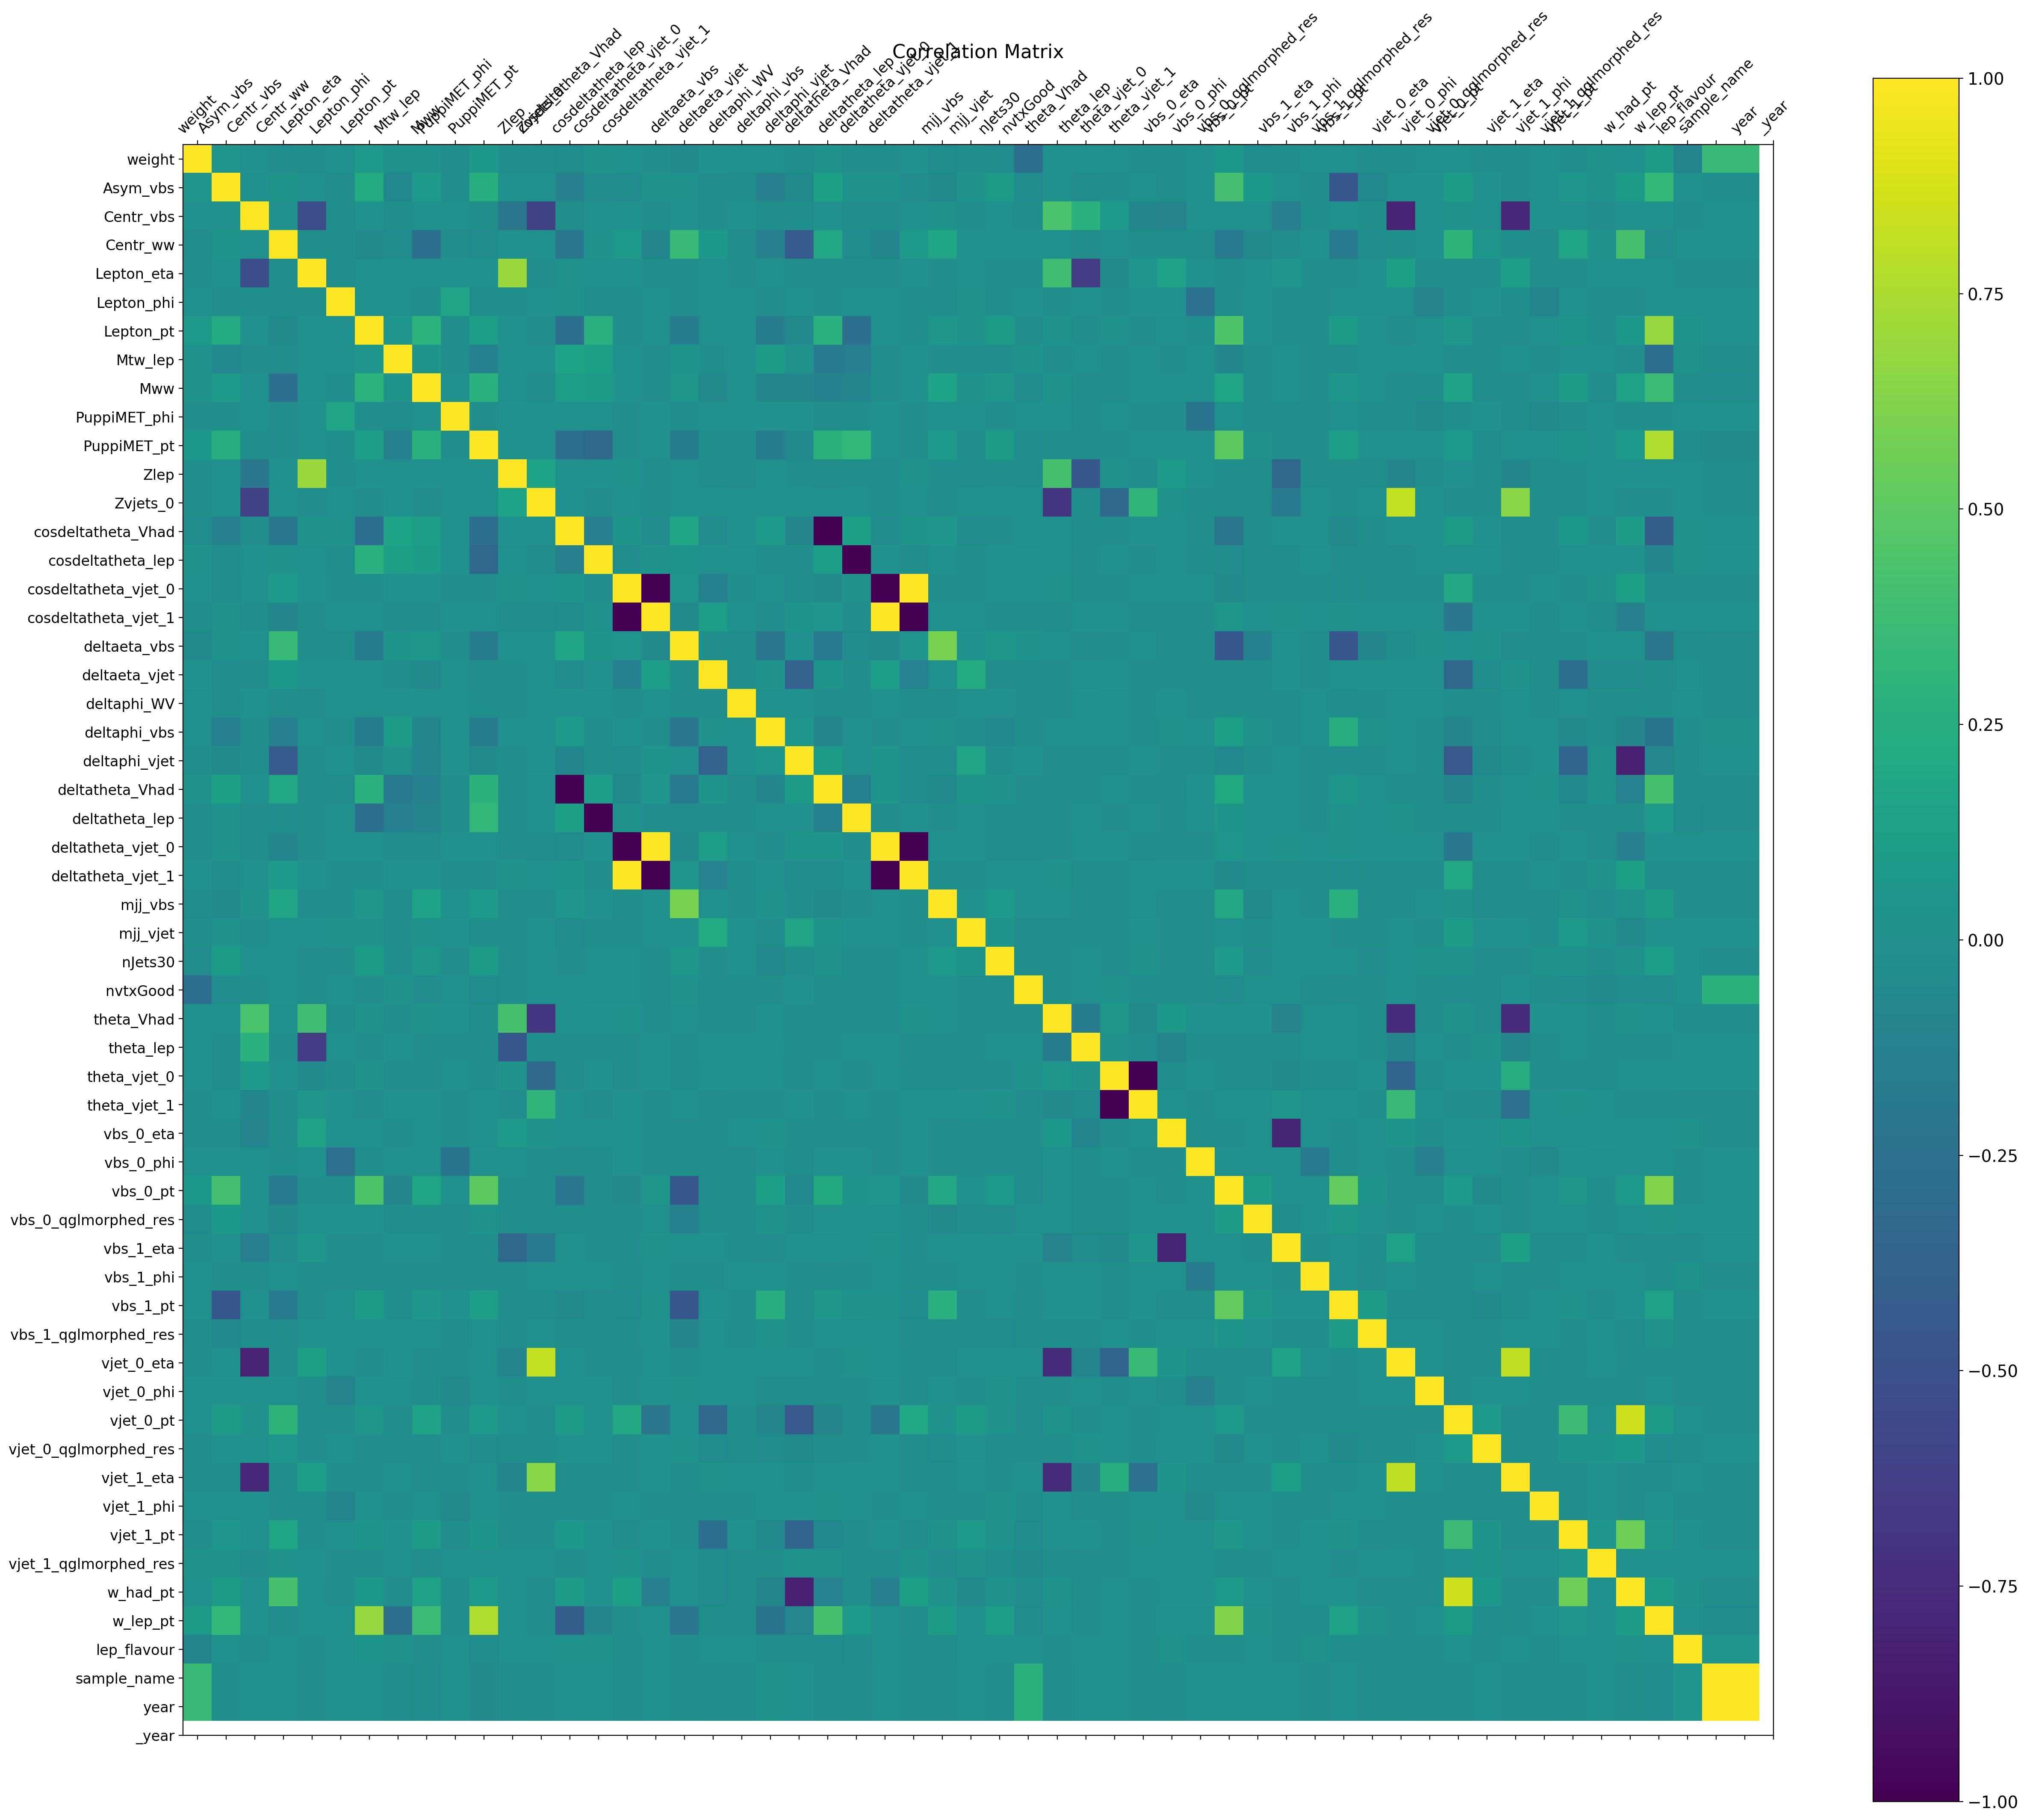

In [16]:
f = plt.figure(figsize=(30, 26), dpi=200)
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);